# Model developement to predict the rating of a movie: Part-III  (applying PCA with all default arguments)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

In [2]:
# Import the datasets
IMDB_only = pd.read_csv('pre-processed_dataset/IMDB_only.csv', index_col = 0)
IMDB_Kaggle_common = pd.read_csv('pre-processed_dataset/IMDB_Kaggle_common.csv', index_col = 0)

In [3]:
#IMDB_only.shape, IMDB_Kaggle_common.shape

In [4]:
y = IMDB_only['avg_vote']
X = IMDB_only.drop(columns = 'avg_vote')

In [65]:
print(X.shape)
#print(y.shape)

(69458, 1088)


## train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(48620, 1088)
(20838, 1088)


In [7]:
# PCA with all default arguments
pca = PCA()
pca1 = pca.fit(X_train)
pca1_train = pca1.transform(X_train)
pca1_test = pca1.transform(X_test)
variance = pca1.explained_variance_ratio_
variance[:15]

#Output:
#[0.30476809121619186,
# 0.1682086818774086,
# 0.05150448785425715,
# 0.042094380541708144,
# 0.03504289931651358,
# 0.026270276477107092,
# 0.022660203064789032,
# 0.020329030729842913,
# 0.01607262796414132,
# 0.015539609502561455,
# 0.014147424485202849,
# 0.012695973215188873,
# 0.010748522003045585,
# 0.009926005663720237,
# 0.009394994290116893]

array([0.30476809, 0.16820868, 0.05150449, 0.04209438, 0.0350429 ,
       0.02627028, 0.0226602 , 0.02032903, 0.01607263, 0.01553961,
       0.01414742, 0.01269597, 0.01074852, 0.00992601, 0.00939499])

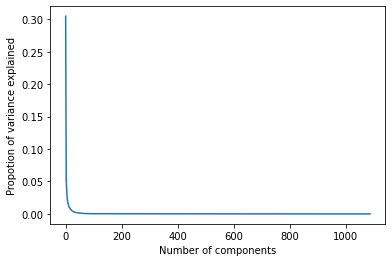

In [8]:
# Plot the variance
plt.plot(range(len(variance)), variance)
plt.xlabel('Number of components')
plt.ylabel('Propotion of variance explained')
plt.show()

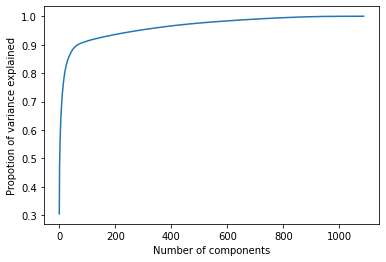

In [9]:
# Plot the variance
cum_sum_variance = np.cumsum(variance)
plt.plot(range(len(variance)), cum_sum_variance)
plt.xlabel('Number of components')
plt.ylabel('Propotion of variance explained')
plt.show()


In [10]:
cum_sum_variance2 = cum_sum_variance.tolist()

In [11]:

value_95 = np.percentile(cum_sum_variance2, 95)

In [12]:
cum_sum_variance2

[0.30476809121619186,
 0.4729767730936004,
 0.5244812609478575,
 0.5665756414895656,
 0.6016185408060792,
 0.6278888172831864,
 0.6505490203479753,
 0.6708780510778183,
 0.6869506790419596,
 0.7024902885445211,
 0.716637713029724,
 0.7293336862449129,
 0.7400822082479585,
 0.7500082139116787,
 0.7594032082017956,
 0.7687563008775433,
 0.7773834568103382,
 0.7847942561190525,
 0.7919170652156456,
 0.7985538712896908,
 0.8047050867899785,
 0.8099798254055867,
 0.8149692224750009,
 0.8198413332292758,
 0.8242168505482359,
 0.8284934145931181,
 0.8323400481631601,
 0.8361148467040853,
 0.8395520075322103,
 0.8429547877582676,
 0.8459852618774264,
 0.8489214278611336,
 0.8516303389285832,
 0.8540795919072027,
 0.8564902402658586,
 0.8588663287071523,
 0.8611101771773207,
 0.863270842720315,
 0.8653520941250208,
 0.867404996989788,
 0.8694334343386301,
 0.8713608986786169,
 0.8732781956007335,
 0.8751331622806852,
 0.8768679563597092,
 0.8785201160596194,
 0.8801366668516089,
 0.881658938768

In [13]:
value_95

0.9999072029765089

In [14]:
type(cum_sum_variance2)

list

In [15]:
index_99 = cum_sum_variance2.index(0.9871489491270147)
index_99

652

In [ ]:
#np.where(cum_sum_variance == value_95)

In [ ]:
#cum_sum_variance2.index(value_95)

In [ ]:
#len(a)

#output
#1088

In [ ]:
#print(pca1.components_)
#print(pca1.n_features_)
#print(pca1.n_samples_)

In [73]:
pca_transformed_train = pca1_train[:, 0:1000]
pca_transformed_test = pca1_test[:, 0:1000]

### Ordinary Linear Regression

In [74]:
lr = LinearRegression()
lr.fit(pca_transformed_train, y_train)
y_train_predict = lr.predict(pca_transformed_train)
y_test_predict = lr.predict(pca_transformed_test)

In [75]:
np.max(y_train_predict), np.max(y_test_predict) 
# With default PCA, if all components are kept, y_test_predict = 1832664504770.253

(9.596983144005105, 9.254089780362467)

In [76]:
lr.intercept_, sorted(lr.coef_)[:10]

(5.914574249280131,
 [-1.9109655899929572,
  -1.5069918429435172,
  -1.503409545197361,
  -1.3383273264911106,
  -1.2863383880863142,
  -1.2438431172508635,
  -1.203491559934318,
  -1.1914066568868185,
  -1.1072607849936844,
  -1.002361595115322])

In [77]:
r2_score(y_train, y_train_predict), r2_score(y_test, y_test_predict)
# With n_components = 10, r2(train) = 0.282, r2(test) = 0.297


(0.43032786009086554, 0.42158088617178713)

In [71]:
#With default PCA, taking 651 features out of it, give r2(train) = 0.4202602597726296, r2(test) = 0.41524460001015207 
#With default PCA, taking 300 features out of it, give r2(train) = 0.40069324204273205, r2(test) = 0.40332469399338367 
#With default PCA, taking 500 features out of it, give r2(train) = 0.41206037587239575, r2(test) = 0.40868072906102304 
#With default PCA, taking 700 features out of it, give r2(train) = 0.42215258292459845, r2(test) = 0.4159146133560834 
#With default PCA, taking 750 features out of it, give r2(train) = 0.42423581513519304, r2(test) = 0.41732864600822994 
#With default PCA, taking 800 features out of it, give r2(train) = 0.4263313726644138, r2(test) = 0.41905434499205096
#With default PCA, taking 900 features out of it, give r2(train) = 0.42897799913686985, r2(test) = 0.42144591773069895
#With default PCA, taking 1000 features out of it, give r2(train) = 0.43032786009086554, r2(test) = 0.42158088617178713
#With default PCA, taking 1088 features out of it, give r2(train) = 0.4289203631442904, r2(test) = -7.683747921219262e+20

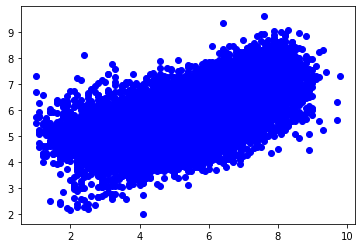

In [78]:
#plot the y_test and y_predict
plt.scatter(y_train,y_train_predict,  color = 'b')
plt.show()

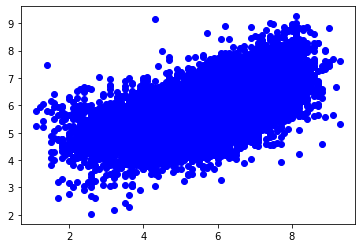

In [79]:
#plot the y_test and y_predict
plt.scatter(y_test,y_test_predict,  color = 'b')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error
print("The mean squared error:", mean_squared_error(y_test, y_test_predict))

from sklearn.metrics import mean_squared_error
print("The root mean squared error:", mean_squared_error(y_test, y_test_predict, squared = False))

from sklearn.metrics import mean_absolute_error
print("The mean absolute error:", mean_absolute_error(y_test, y_test_predict))

The mean squared error: 0.8474023878168839
The root mean squared error: 0.9205446147889216
The mean absolute error: 0.7024798589509904


### Lasso Linear Regression

In [81]:
alpha = [0.01, 0.1, 1, 10]
for alp in alpha:
    lasso1 = Lasso(alpha=alp)
    lasso1.fit(pca_transformed_train, y_train)
    y_train_predict1 = lasso1.predict(pca_transformed_train)
    y_test_predict1 = lasso1.predict(pca_transformed_test)
    print(alp)
    print(r2_score(y_train, y_train_predict1))
    print(r2_score(y_test, y_test_predict1))

0.01
0.31286170993203344
0.3257262774935512
0.1
0.20527182235787633
0.214858489924854
1
0.0
-0.00026864922856795204
10
0.0
-0.00026864922856795204


In [85]:
alpha2 = [0.01, 0.1, 1, 10, 20, 30, 50]
for alp2 in alpha2:
    Rge = Ridge(alpha=alp2)
    Rge.fit(pca_transformed_train, y_train)
    y_train_predict2 = Rge.predict(pca_transformed_train)
    y_test_predict2 = Rge.predict(pca_transformed_test)
    print(alp2)
    print(r2_score(y_train, y_train_predict2))
    print(r2_score(y_test, y_test_predict2))
    print(np.max(y_test_predict2))

0.01
0.4303278366100687
0.42159209842653944
9.25365650621656
0.1
0.4303256189123478
0.421689044211334
9.249776638560745
1
0.4301711736915196
0.42237757278631693
9.212774403098827
10
0.4258804864252209
0.4221244384959606
8.965800223588243
20
0.4207576939006771
0.41916544149541346
8.839271719123609
30
0.4162858657354268
0.41611407072760065
8.84034841644275
50
0.4090704831413676
0.41076092252903085
8.83804021287187


In [87]:
# Applying GridSearchCV
Rge3 = Ridge()
alpha = [0.01, 0.1, 1, 0, 20, 30]
parameters = {'alpha': alpha}
rge3_grid = GridSearchCV(Rge3, param_grid = parameters, scoring = 'r2', cv = 5)
rge3_grid.fit(pca_transformed_train, y_train)

print(rge3_grid.best_score_)
print(rge3_grid.best_params_)

0.41014544114783813
{'alpha': 1}


In [89]:
# Applying RandomizedSearchCV
Rge4 = Ridge()
alpha4 = {'alpha': np.linspace(0.01, 30, 15)} 
Rge4_random = RandomizedSearchCV(Rge4, param_distributions = alpha4, cv = 5)
Rge4_random.fit(pca_transformed_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([1.00000000e-02, 2.15214286e+00, 4.29428571e+00, 6.43642857e+00,
       8.57857143e+00, 1.07207143e+01, 1.28628571e+01, 1.50050000e+01,
       1.71471429e+01, 1.92892857e+01, 2.14314286e+01, 2.35735714e+01,
       2.57157143e+01, 2.78578571e+01, 3.00000000e+01])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [90]:
print(Rge4_random.best_score_)
print(Rge4_random.best_params_)

0.4115251356564557
{'alpha': 8.578571428571427}


 **<font color = 'teal'> Note: Among the three regression models (Simple linear Regression, Lasso, Ridge), applying PCA, with PCA features= 1000, the maximum value obtained is 0.42 in both Simple Linear Regression and Ridge regression.**

# Model optimization

# Random Forest Model

In [107]:
pca_transformed_train = pca1_train[:, 0:650]
pca_transformed_test = pca1_test[:, 0:650]
# With 1000 pCA features, the computation time in the order of hours, hence I prefer to take few 

In [109]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 10, random_state = 42)
regr.fit(pca_transformed_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [111]:
y_predict3 = regr.predict(pca_transformed_test)

In [112]:
r2_score(y_test, y_predict3)

0.38480717510492335

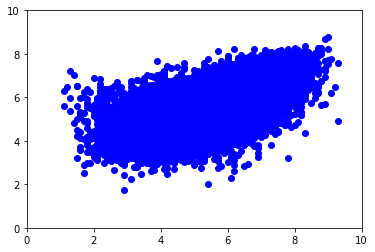

In [103]:
plt.scatter(y_test, y_predict3, color = 'b')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

In [113]:
regr2 = RandomForestRegressor(n_estimators=10, random_state = 42)
regr2.fit(pca_transformed_train, y_train)
y_predict4 = regr2.predict(pca_transformed_test)
r2_score(y_test, y_predict4)

0.38480717510492335

In [114]:
regr2 = RandomForestRegressor(n_estimators=20, random_state = 42)
regr2.fit(pca_transformed_train, y_train)
y_predict4 = regr2.predict(pca_transformed_test)
r2_score(y_test, y_predict4)

0.41582072536328607

In [115]:
# RandomForestRegressor without PCA

In [116]:
regr = RandomForestRegressor(n_estimators = 10, random_state = 42)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
r2_score(y_test, y_predict)

0.397126256565034

In [117]:
regr = RandomForestRegressor(n_estimators = 20, random_state = 42)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
r2_score(y_test, y_predict)

0.42227060494607327

In [118]:
import datetime
start = datetime.datetime.now() 
regr = RandomForestRegressor(n_estimators = 50, random_state = 42)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
r2_score(y_test, y_predict)
end = datetime.datetime.now()
print(start, end)

2021-09-05 17:06:33.549431 2021-09-05 17:09:25.923681


In [119]:
r2_score(y_test, y_predict)

0.43607401813220004

In [120]:
import datetime
start = datetime.datetime.now() 
regr = RandomForestRegressor(n_estimators = 100, random_state = 42)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
print(r2_score(y_test, y_predict))
end = datetime.datetime.now()
print(start, end)


0.44038770614893497
2021-09-05 17:11:48.535859 2021-09-05 17:18:51.747604


In [121]:
import datetime
start = datetime.datetime.now() 
regr = RandomForestRegressor(n_estimators = 150, random_state = 42)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
print(r2_score(y_test, y_predict))
end = datetime.datetime.now()
print(start, end)

0.44187214015384024
2021-09-05 17:19:45.719898 2021-09-05 17:28:14.144452


In [122]:
import datetime
start = datetime.datetime.now() 
regr = RandomForestRegressor(n_estimators = 200, random_state = 42)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
print(r2_score(y_test, y_predict))
end = datetime.datetime.now()
print(start, end)

0.4433342712209878
2021-09-05 18:02:03.100051 2021-09-05 18:14:51.675804


In [ ]:
# While 10 PCA were used, RandomForestRegressor (n_estimators = 0) performance was better with r2 value 0.44

**<font color = 'teal'> Note: From above, it can be concluded that the Random Forest Regressor model performance is better than Linear Regresson model, though one can not rely on the model performance as the r2 score very low. We need to improve this.** 

# Gradient boosting 

In [123]:
def opt_gradientboosting(learning_rate, n_estimator, max_features, max_depth):
    for rate in learning_rate:
        gb = GradientBoostingRegressor(learning_rate = rate, n_estimators = n_estimator,  max_features = max_features, max_depth = max_depth)
        gb.fit(pca_transformed_train, y_train)
        y_gb_predict = gb.predict(pca_transformed_test)
        score_1 = r2_score(y_test,y_gb_predict)
        print(rate)
        print(score_1)
    return print('End')

#learning_gb.fitX_train, y_trainrates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
#gb = GradientBoostingRegressor()
#n_estimator = 20
#max_features = 1027
#max_depth = [2, 3]
#paramters = {'n_estimators': n_estimator, 'learning_rate': learning_rates, 'max_features':max_features, 'max_depth':max_depth}
#gr = GridSearchCV(gb, param_grid = paramters, n_jobs = -1)
#gr.fit(X_train, y_train)

In [124]:
learning_rate = [0.1, 1, 1.5, 2]

opt_gradientboosting(learning_rate, 10, 3, 3)

0.1
0.17049960670901487
1
0.2835193156735576
1.5
0.14518771367368022
2
-0.0283465274916761
End


In [125]:
gbr2 = GradientBoostingRegressor()
learning_rate = [0.1, 1]
n_estimators = [10, 50, 100, 200]
max_features = [3, 5]
max_depth = [3, 5]
parameters = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth}
grid_search2 = GridSearchCV(estimator = gbr2, param_grid = parameters, scoring = 'r2', cv = 5 )

grid_search2.fit(pca_transformed_train, y_train)

print(grid_search2.best_score_)
print(grid_search2.best_params_)

0.45859502850032224
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 5, 'n_estimators': 200}


In [129]:
start = datetime.datetime.now()
gbr4 = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 300, max_features= 650, max_depth = 5)
gbr4.fit(pca_transformed_train, y_train)
y_train_predict4 = gbr4.predict(pca_transformed_train)
y_test_predict4 = gbr4.predict(pca_transformed_test)
score_1 = r2_score(y_test,y_test_predict4)
end = datetime.datetime.now()
print(score_1)
print(start, end)
# After 9 hours of run also, there was no output.

KeyboardInterrupt: 

# Summary:

The default PCA was applied and around 99% features were taken for model building. Linear Regression model performance improved resonably as compared to without PCA.  

However the other models Random Forest Regressor and Gradient Boosting Regressor performance didn't improve, instead found to be less (r2_score: 0.458) as comaped to non-PCA case(r2_score: 0.50).